The dataset consists of various features such as gender, age, height, weight, duration of activity, heart rate, body temperature, and calories burned. A machine learning model could be trained on such data to predict various outcomes, such as the number of calories burned based on activity duration, weight, and other factors. By training a machine learning model on this dataset, you could predict calorie burn based on user input for similar physical activities.

##### Import libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Read dataset

In [51]:
exercise_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\Calories Burnt\exercise.csv")

In [52]:
exercise_dataset.head(n=3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [53]:
cal_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\Calories Burnt\calories.csv")

In [54]:
cal_dataset.head(n=3)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0


Concat dataset

In [56]:
calories_dataset = pd.concat([exercise_dataset, cal_dataset['Calories']], axis= 1)

In [57]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [58]:
calories_dataset.shape

(15000, 9)

In [59]:
calories_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [60]:
calories_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [61]:
calories_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [62]:
calories_dataset.drop_duplicates()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [63]:
calories_dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [64]:
calories_dataset.groupby('Gender').mean()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,,,,,,,,
female,1.497932e+07,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
male,1.497537e+07,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153,90.945750


##### Data Visualization

In [66]:
sns.set()

In [67]:
calories_dataset['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

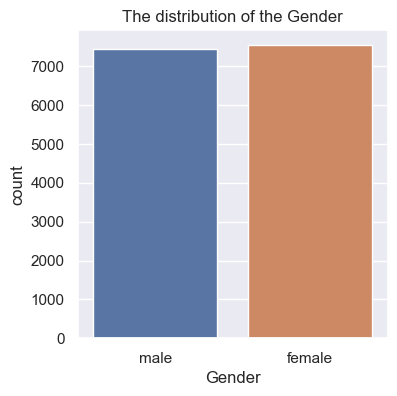

In [68]:
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data= calories_dataset)
plt.title('The distribution of the Gender')
plt.show

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

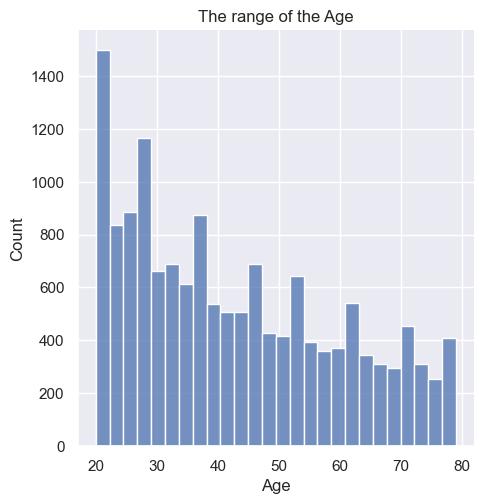

In [69]:
plt.figure(figsize=(4,4))
sns.displot(calories_dataset['Age'])
plt.title('The range of the Age')
plt.show()

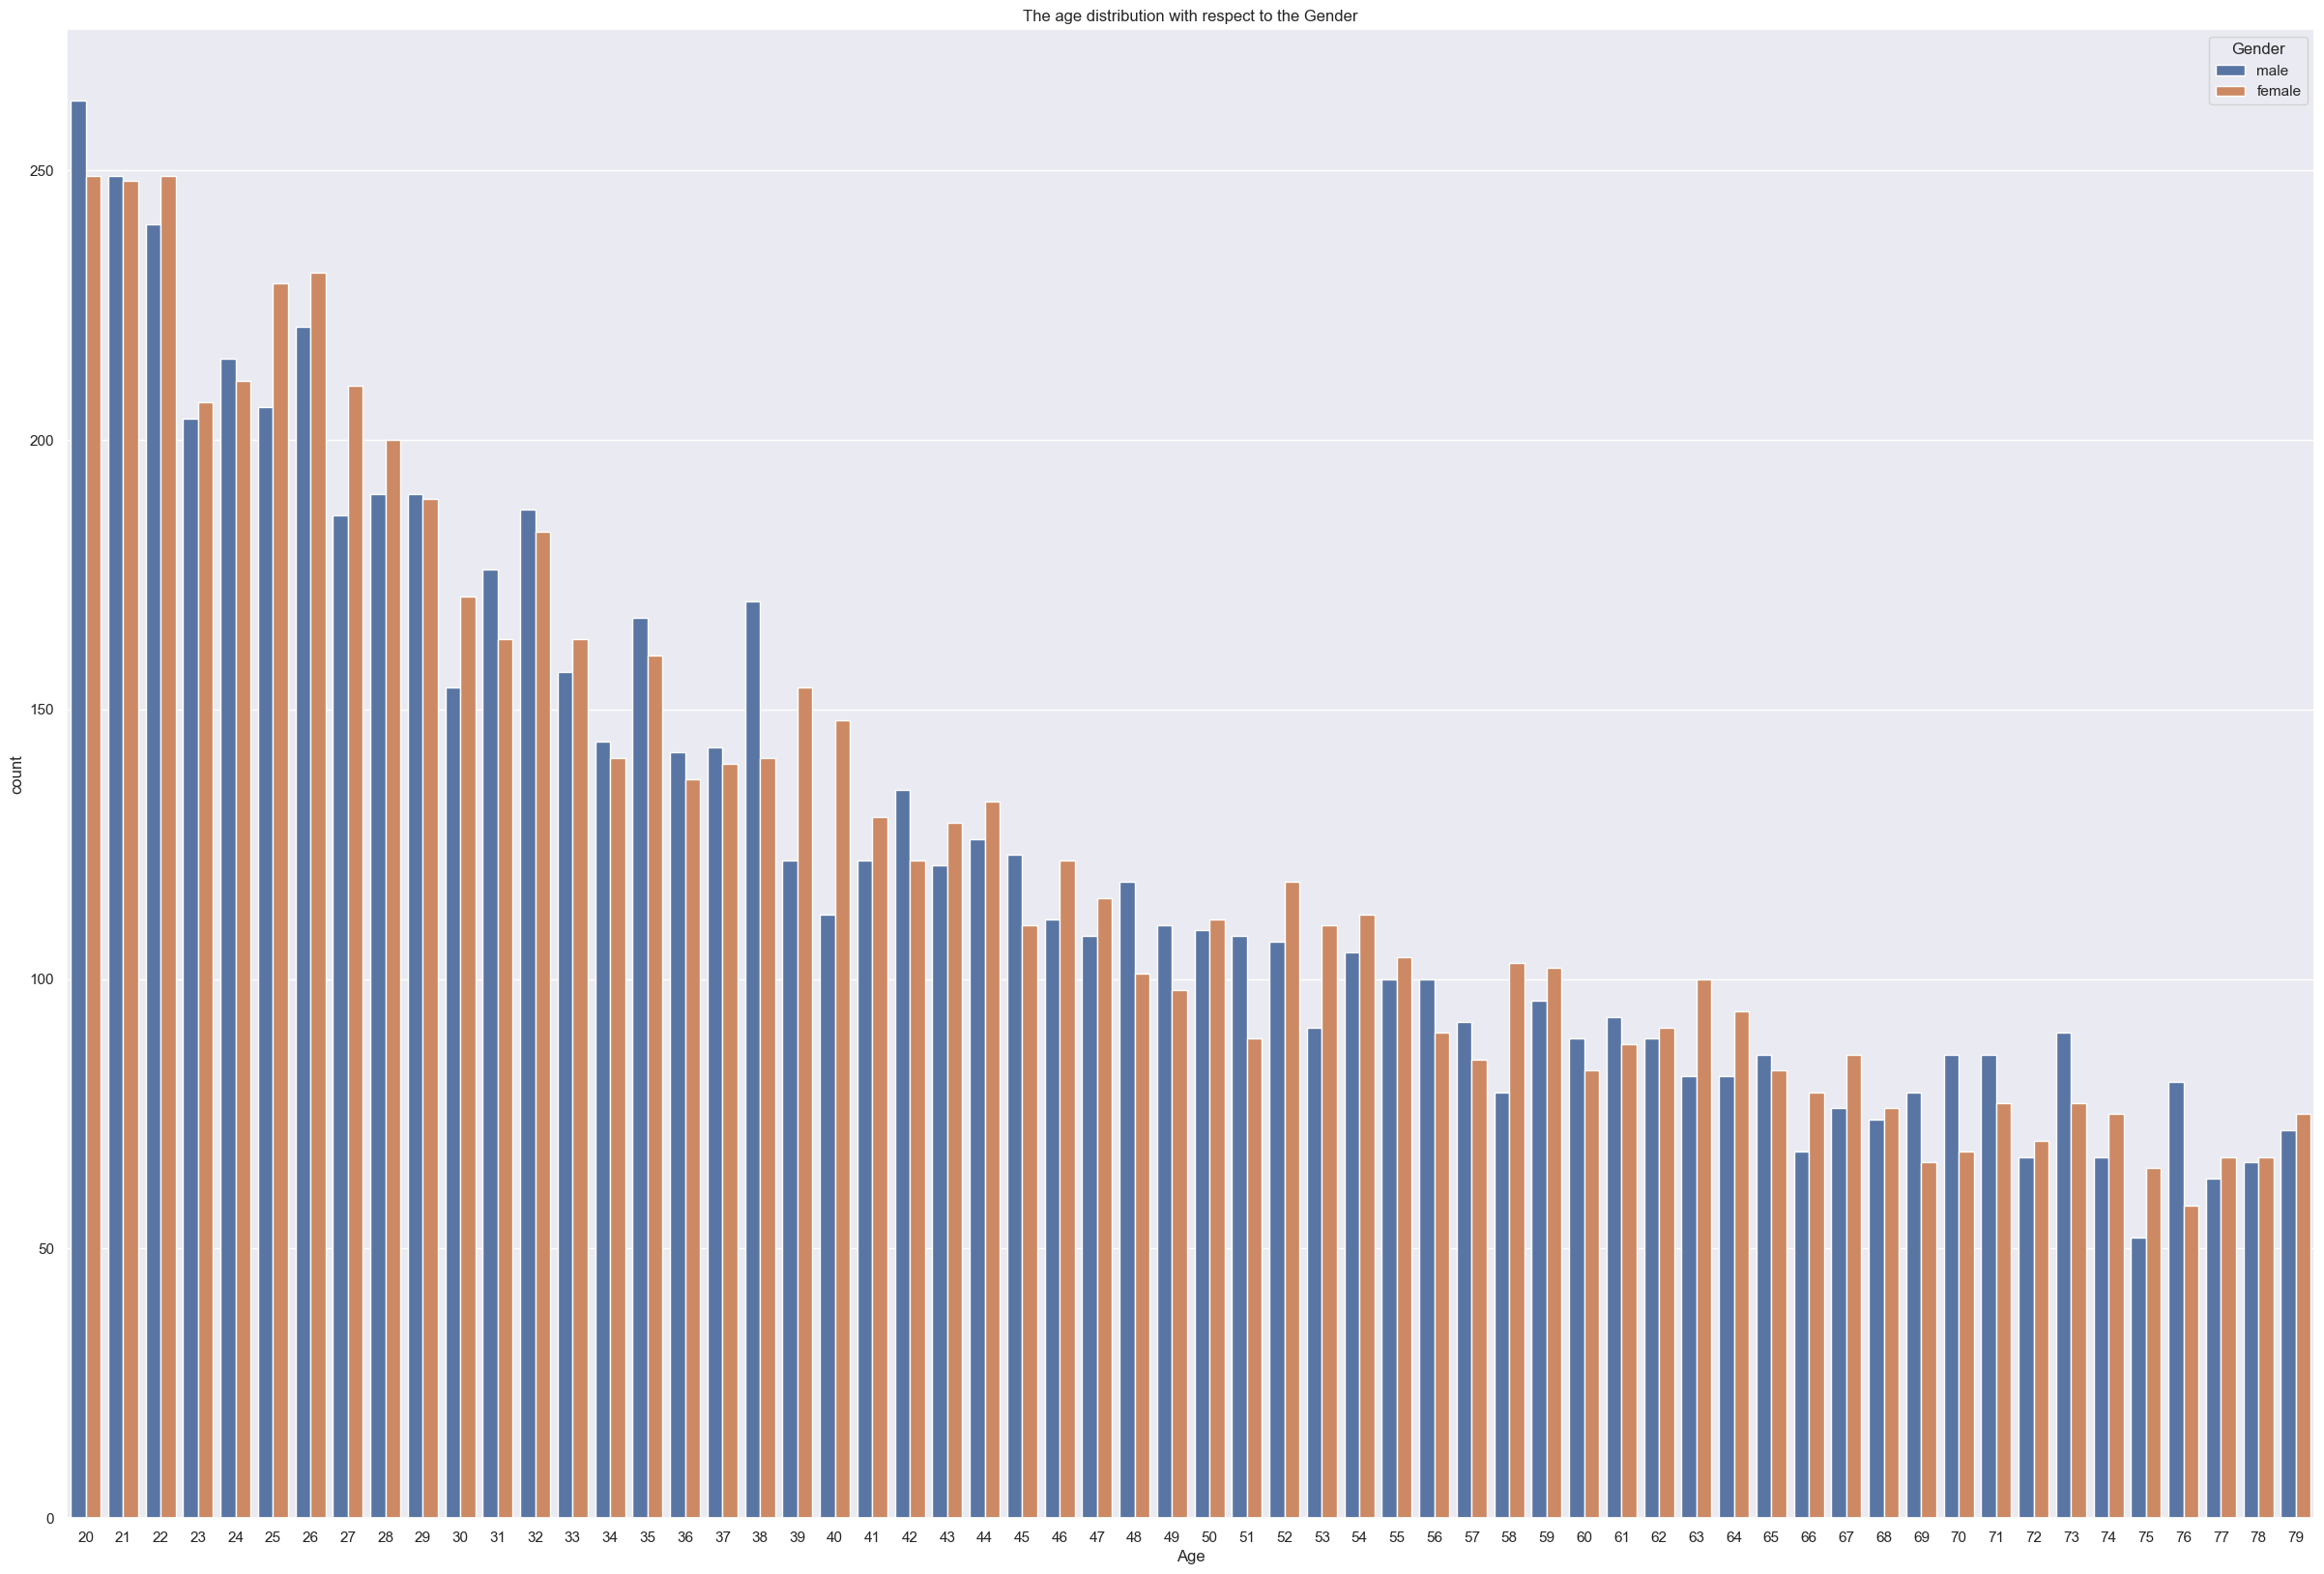

In [70]:
plt.figure(figsize=(30,20))
sns.countplot(x='Age', data= calories_dataset, hue= 'Gender')
plt.title('The age distribution with respect to the Gender')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

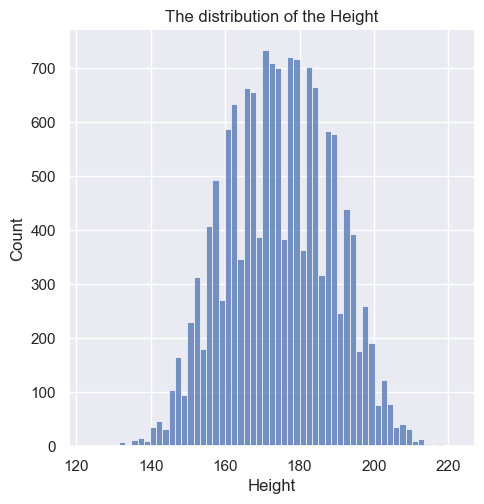

In [71]:
plt.figure(figsize=(10,10))
sns.displot(calories_dataset['Height'])
plt.title('The distribution of the Height')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

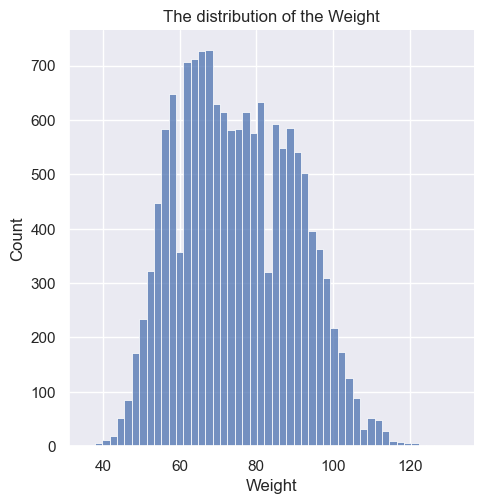

In [72]:
plt.figure(figsize=(10,10))
sns.displot(calories_dataset['Weight'])
plt.title('The distribution of the Weight')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

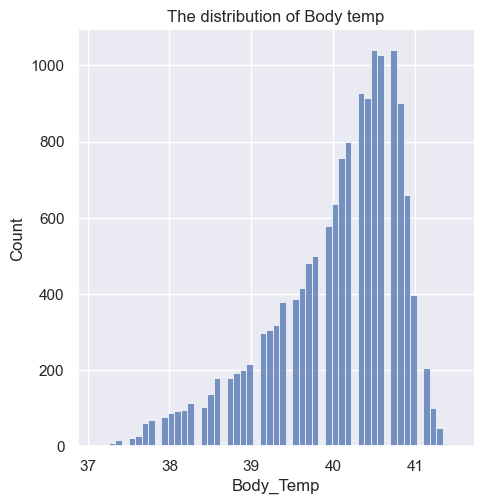

In [73]:
plt.figure(figsize=(6,6))
sns.displot(calories_dataset['Body_Temp'])
plt.title('The distribution of Body temp')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

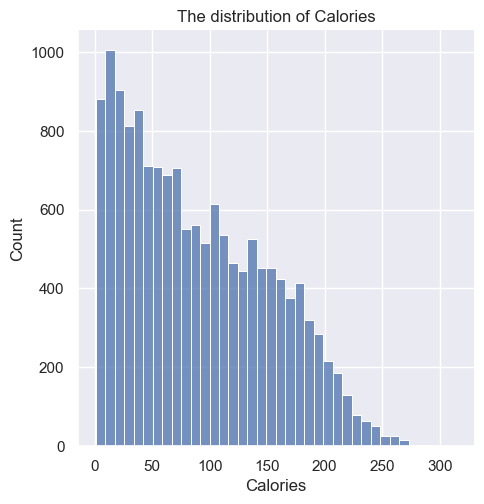

In [74]:
plt.figure(figsize=(6,6))
sns.displot(calories_dataset['Calories'])
plt.title('The distribution of Calories')
plt.show()

In [75]:
calories_dataset.replace({'Gender':{'male': 0,'female': 1}}, inplace= True)

In [76]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

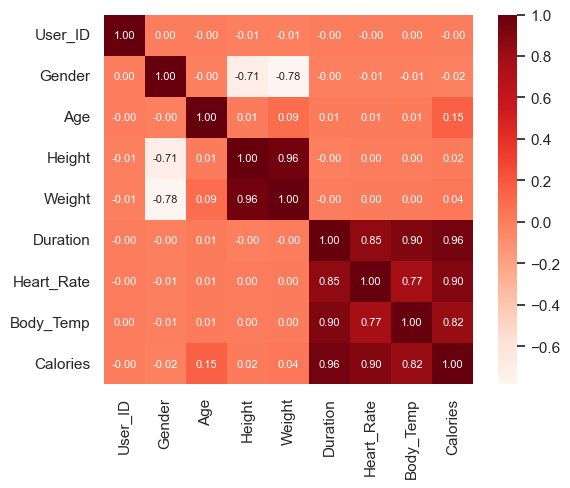

In [77]:
calories_dataset_corr = calories_dataset.corr()
sns.heatmap(calories_dataset_corr, cbar= True, square= True, fmt= '.2f', annot= True, annot_kws= {'size': 8}, cmap= 'Reds')

##### Spliting data into variables and target

In [79]:
X = calories_dataset.drop(columns= ['Calories','User_ID'], axis = 1)
Y = calories_dataset['Calories']

In [80]:
X.head(n=3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7


In [81]:
Y.head(n=3)

0    231.0
1     66.0
2     26.0
Name: Calories, dtype: float64

##### Spliting dataset into Training and Testing data 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [85]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

In [86]:
#scaler = StandardScaler()

In [87]:
#scaler.fit_transform(X_train)
#scaler.transform(X_test)

##### Model Training

In [89]:
# libraries for training model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
# libraries for model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Model training using random Forest Regressor

In [92]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [93]:
train_data_prediction = model_rf.predict(X_train)
test_data_prediction = model_rf.predict(X_test)

In [94]:
train_data_r2 = r2_score(train_data_prediction, Y_train)
train_data_MAE = mean_absolute_error(train_data_prediction, Y_train)
train_data_MSE = mean_squared_error(train_data_prediction, Y_train)
print(f'The training data r2 score: {train_data_r2}')
print(f'The training data MAE score: {train_data_MAE}')
print(f'The training data MSE score: {train_data_MSE}')

The training data r2 score: 0.999692515027455
The training data MAE score: 0.6749025
The training data MSE score: 1.190555925


In [95]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9981415670483174
The testing data MAE score: 1.69746
The testing data MSE score: 7.193705600000001


In [96]:
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum depth of each tree
    'min_samples_split': [2, 5],         # Minimum samples required to split a node
}

In [97]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5,  n_jobs=-1, verbose=2, scoring='accuracy')

In [98]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [99]:
best_params = grid_search.best_params_

In [100]:
best_model = grid_search.best_estimator_

In [101]:
test_prediction = best_model.predict(X_test)
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.997142580937406
The testing data MAE score: 2.25146072141641
The testing data MSE score: 11.032416663013612


Gradient Boosting Regressor

In [103]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, Y_train)

GradientBoostingRegressor()

In [104]:
training_data_prediction = model_gbr.predict(X_train)
testing_data_prediction = model_gbr.predict(X_test)

In [105]:
train_data_r2 = r2_score(training_data_prediction,Y_train)
train_data_MAE = mean_absolute_error(training_data_prediction,Y_train)
train_data_MSE = mean_squared_error(training_data_prediction,Y_train)
print(f'The training data r2 score: {train_data_r2}')
print(f'The training data MAE score: {train_data_MAE}')
print(f'The training data MSE score: {train_data_MSE}')

The training data r2 score: 0.996662590586898
The training data MAE score: 2.615525970119419
The training data MSE score: 12.838549096824783


In [106]:
test_data_r2 = r2_score(testing_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(testing_data_prediction, Y_test)
test_data_MSE = mean_squared_error(testing_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9962338705566183
The testing data MAE score: 2.778304266644557
The testing data MSE score: 14.569056068777755


In [107]:
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01,0.05],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [108]:
grid_search = GridSearchCV(estimator= model_gbr, param_grid = param_grid, cv=5, n_jobs= -1, verbose=2, scoring ='r2' )

In [109]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [110]:
best_params = grid_search.best_params_

In [111]:
best_model_gbr = grid_search.best_estimator_

In [112]:
test_data_prediction = best_model_gbr.predict(X_test)

In [113]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.997402183724213
The testing data MAE score: 2.333025396589954
The testing data MSE score: 10.138417322173504


Model training using Support Vector Machine

In [115]:
model_svr = SVR()
model_svr.fit(X_train,Y_train)

SVR()

In [116]:
test_data_prediction = model_svr.predict(X_test)
train_data_prediction = model_svr.predict(X_train)

In [117]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9118645882399462
The testing data MAE score: 10.62061436292772
The testing data MSE score: 243.29310231858554


In [118]:
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'epsilon': [0.01, 0.1, 0.2, 0.5]          # Epsilon parameter for the loss function
}

In [119]:
grid_search = GridSearchCV(estimator= model_svr, param_grid= param_grid, cv= 5, n_jobs= -1, verbose= 2, scoring= 'r2')

In [120]:
grid_search.fit(X_test, Y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='r2', verbose=2)

In [121]:
best_params = grid_search.best_params_

In [122]:
best_model_svr = grid_search.best_estimator_

In [123]:
test_data_prediction = best_model_svr.predict(X_test)

In [124]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9925876568938921
The testing data MAE score: 3.4157970085369214
The testing data MSE score: 28.00514615302628


Model Training using XGBoost

In [126]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
test_data_prediction = model_xgb.predict(X_test)

In [143]:
test_data_r2= r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9987986496234057
The testing data MAE score: 1.4833678883314132
The testing data MSE score: 4.710710012461346


In [146]:
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],         # Step size shrinkage
    'max_depth': [3, 4, 5, 6],                  # Maximum tree depth
}

In [148]:
grid_search = GridSearchCV(estimator=model_xgb, param_grid= param_grid,cv= 5, n_jobs=-1, verbose=2, scoring='r2')              

In [150]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [152]:
best_params = grid_search.best_params_

In [154]:
best_model_xgr= grid_search.best_estimator_

In [156]:
test_data_prediction = best_model_xgr.predict(X_test)

In [158]:
test_data_r2 = r2_score(test_data_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_data_prediction, Y_test)
test_data_MSE = mean_squared_error(test_data_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2}')
print(f'The testing data MAE score: {test_data_MAE}')
print(f'The testing data MSE score: {test_data_MSE}')

The testing data r2 score: 0.9994048223979891
The testing data MAE score: 1.0808693583408993
The testing data MSE score: 2.3316333496198793


Result

In [160]:
test_data_results = {
    'Model': ['Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Machine', 'XGB Regressor'],
    'R Square': [0.9970932237164536, 0.9974021273956656, 0.9925876568938921, 0.9994048223979891],
    'MAE': [2.2724120585165153, 2.333025396589954, 3.4157970085369214, 1.0808693583408993],
    'MSE': [11.221302233596658, 10.138607361817227, 28.00514615302628, 2.3316333496198793]
}

In [162]:
test_data_results= pd.DataFrame(test_data_results)

In [164]:
test_data_results

,Model,R Square,MAE,MSE
0,Forest Regressor,0.997093,2.272412,11.221302
1,Gradient Boosting Regressor,0.997402,2.333025,10.138607
2,Support Vector Machine,0.992588,3.415797,28.005146
3,XGB Regressor,0.999405,1.080869,2.331633


Test Data Visualization

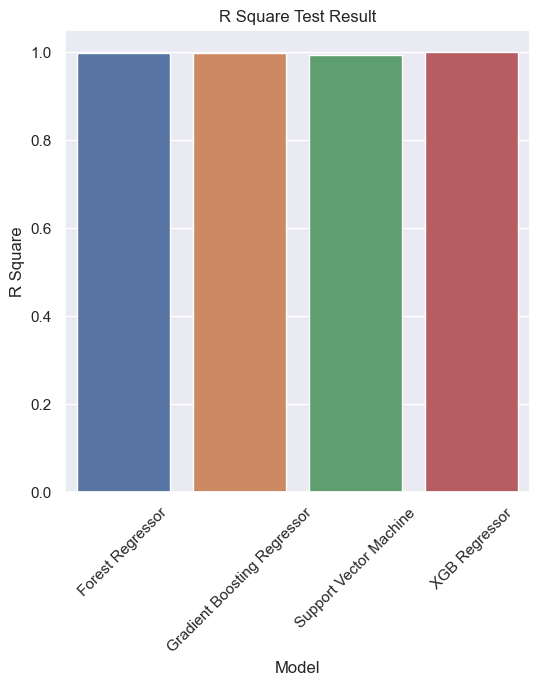

In [167]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='R Square', data=test_data_results)
plt.title('R Square Test Result')
plt.xlabel('Model')
plt.ylabel('R Square')
plt.xticks(rotation=45)
plt.show()

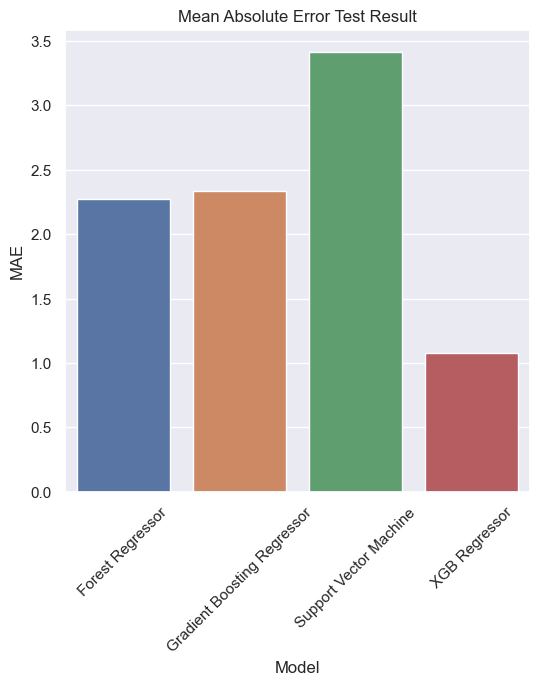

In [169]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='MAE', data=test_data_results)
plt.title('Mean Absolute Error Test Result')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

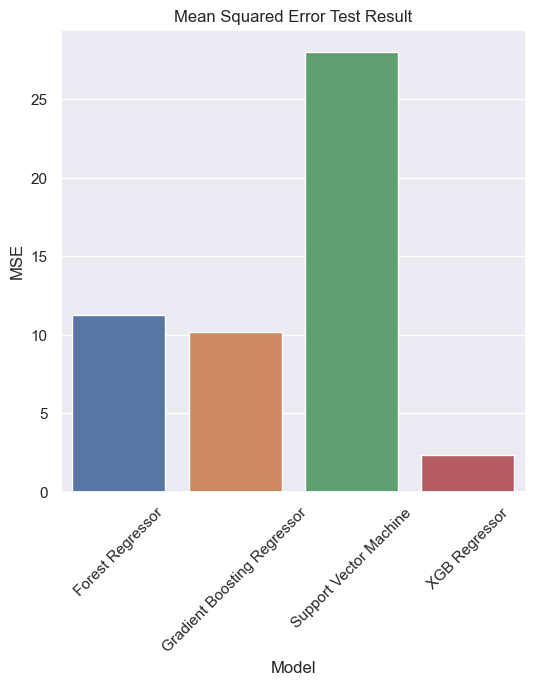

In [171]:
plt.figure(figsize=(6,6))
sns.barplot(x='Model', y='MSE', data=test_data_results)
plt.title('Mean Squared Error Test Result')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

Model Prediction using XGBoosting Regressor

In [182]:
input_data= (0,78,193.0,97.0,2.0,84.0,38.3)
input_data_asarray = np.asarray(input_data)
input_data_reshape= input_data_asarray.reshape(1,-1)
# input_data_std = scaler.transform(input_data_reshape)
# print(input_data_std)
prediction = best_model_xgr.predict(input_data_reshape)
print(prediction)

[10.416063]
